In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('data/insurance/train.csv')
test = pd.read_csv('data/insurance/test.csv')

In [3]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [7]:
test.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [8]:
numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']
categorical_columns = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

In [9]:
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


0    334399
1     46710
Name: Response, dtype: int64


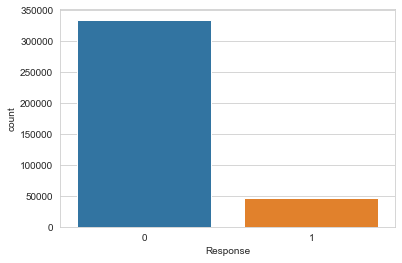

In [10]:
sns.countplot(train['Response'])
print(train['Response'].value_counts())

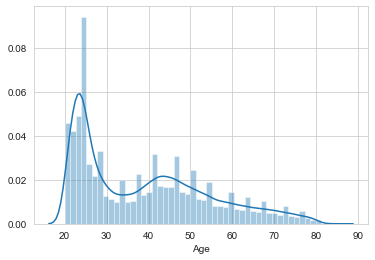

In [11]:
sns.distplot(train['Age'])

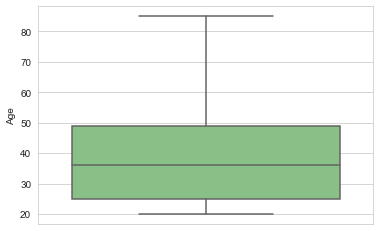

In [12]:
sns.boxplot(y = train['Age'], palette = 'Accent')

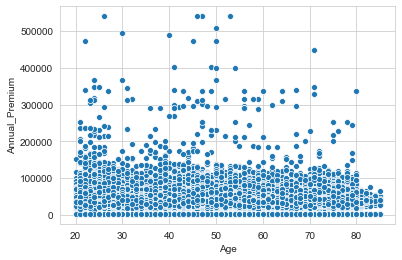

In [13]:
sns.scatterplot(x = train['Age'], y = train['Annual_Premium'])

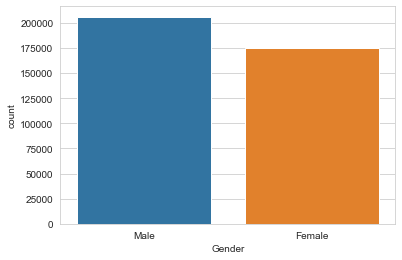

In [14]:
sns.countplot(train['Gender'])

In [15]:
df = train.groupby(['Gender', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()

In [16]:
df

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


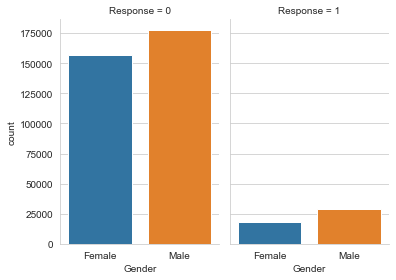

In [17]:
sns.catplot(x = 'Gender', 
            y = 'count', 
            col='Response', 
            data = df, 
            kind = 'bar', 
            height = 4, 
            aspect = 0.7)

In [18]:
df = train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [19]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


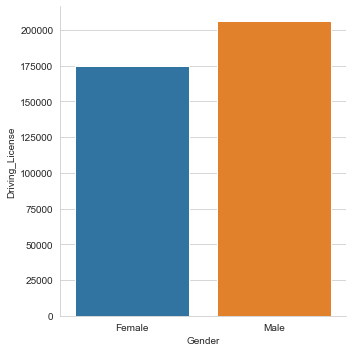

In [20]:
sns.catplot(x = 'Gender', y = 'Driving_License', data = df, kind = 'bar')

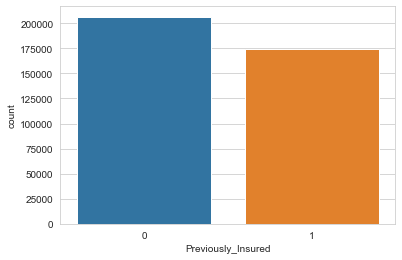

In [21]:
sns.countplot(train['Previously_Insured'])

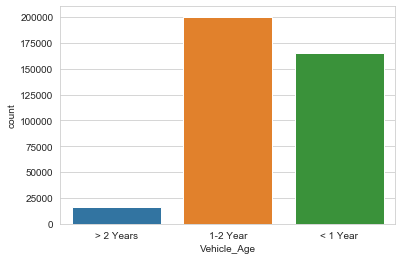

In [22]:
sns.countplot(train['Vehicle_Age'])

In [23]:
df = train.groupby(['Vehicle_Age', 'Response'])['id'].count().to_frame().rename(columns = {'id': 'count'}).reset_index()

In [24]:
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


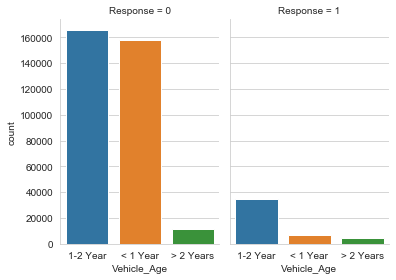

In [25]:
sns.catplot(x = 'Vehicle_Age', y = 'count', col = 'Response', data = df, kind = 'bar', height = 4, aspect = 0.7)

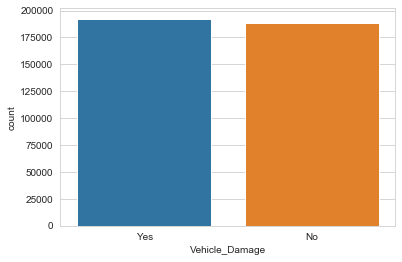

In [26]:
sns.countplot(train['Vehicle_Damage'])

In [27]:
df = train.groupby(['Vehicle_Damage', 'Response'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()

In [28]:
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


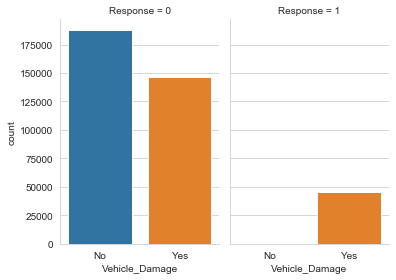

In [29]:
sns.catplot(x = 'Vehicle_Damage', y = 'count', col = 'Response', data = df, kind = 'bar', height = 4, aspect = 0.7)

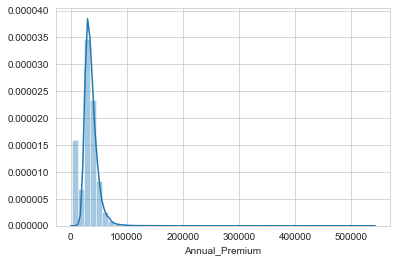

In [30]:
sns.distplot(train['Annual_Premium'])

In [31]:
(train['Annual_Premium'] == 0).sum()

0

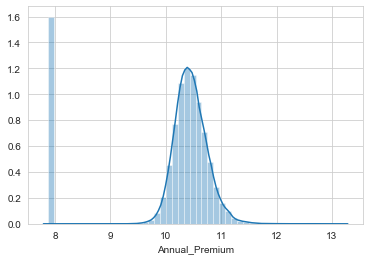

In [32]:
sns.distplot(np.log(train['Annual_Premium']))

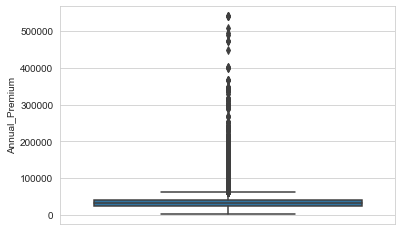

In [33]:
sns.boxplot(y = 'Annual_Premium', data = train)

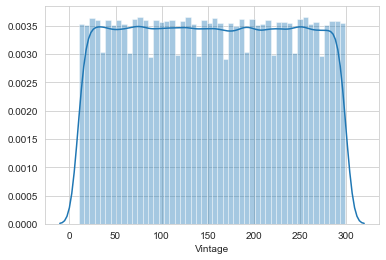

In [34]:
sns.distplot(train['Vintage'])

In [35]:
num_feat = ['Age', 'Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years', 'Vehicle_Damage_Yes', 'Region_Code', 'Policy_Sales_Channel']

In [36]:
train['Gender'] = train['Gender'].map({'Female': 0, 'Male': 1}).astype(int)

In [37]:
train = pd.get_dummies(train, drop_first=True)

In [38]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,30170.0,26.0,88,0,0,0,0
381105,381106,1,30,1,37.0,1,40016.0,152.0,131,0,1,0,0
381106,381107,1,21,1,30.0,1,35118.0,160.0,161,0,1,0,0
381107,381108,0,68,1,14.0,0,44617.0,124.0,74,0,0,1,1


In [39]:
train = train.rename(columns = {"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year'] = train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years'] = train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes'] = train['Vehicle_Damage_Yes'].astype('int')

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [41]:
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])

mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [42]:
train = train.drop('id', axis=1)

In [44]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [45]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.267815,1,26.0,1,0.051234,26.0,-0.792954,0,0,0,0
381105,1,-0.568774,1,37.0,1,0.069551,152.0,-0.279037,0,1,0,0
381106,1,-1.148985,1,30.0,1,0.060439,160.0,0.079509,0,1,0,0
381107,0,1.881007,1,14.0,0,0.078110,124.0,-0.960275,0,0,1,1


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gender                  381109 non-null  object 
 1   Age                     381109 non-null  float64
 2   Driving_License         381109 non-null  object 
 3   Region_Code             381109 non-null  object 
 4   Previously_Insured      381109 non-null  object 
 5   Annual_Premium          381109 non-null  float64
 6   Policy_Sales_Channel    381109 non-null  object 
 7   Vintage                 381109 non-null  float64
 8   Response                381109 non-null  int64  
 9   Vehicle_Age_lt_1_Year   381109 non-null  object 
 10  Vehicle_Age_gt_2_Years  381109 non-null  object 
 11  Vehicle_Damage_Yes      381109 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 34.9+ MB


In [48]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test = pd.get_dummies(test,drop_first=True)
test = test.rename(columns = {"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year'] = test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years'] = test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes'] = test['Vehicle_Damage_Yes'].astype('int')

In [49]:
test[num_feat] = ss.fit_transform(test[num_feat])
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [50]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [52]:
from sklearn.model_selection import train_test_split

X = train.drop(['Response'], axis=1)
y = train['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [53]:
id = test['id']

In [54]:
test = test.drop('id', axis=1)

In [55]:
X_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [58]:
print(train.shape)
print(X_train.shape)

(381109, 12)
(285831, 11)


In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [68]:
"""
random_search = {'criterion': ['entropy', 'gini'], 
                 'max_depth': [2,3,4,5,6,7,10], 
                 'min_samples_leaf': [4, 6, 8], 
                 'min_samples_split': [5, 7, 10], 
                 'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, 
                           param_distributions = random_search, 
                           n_iter = 10, 
                           cv = 4, 
                           verbose = 1, 
                           random_state = 101, 
                           n_jobs = -1)
model.fit(X_train, y_train)
"""

"random_search = {'criterion': ['entropy', 'gini'], \n                 'max_depth': [2,3,4,5,6,7,10], \n                 'min_samples_leaf': [4, 6, 8], \n                 'min_samples_split': [5, 7, 10], \n                 'n_estimators': [300]}\n\nclf = RandomForestClassifier()\nmodel = RandomizedSearchCV(estimator = clf, \n                           param_distributions = random_search, \n                           n_iter = 10, \n                           cv = 4, \n                           verbose = 1, \n                           random_state = 101, \n                           n_jobs = -1)\nmodel.fit(X_train, y_train)"

In [ ]:
"""
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

filename = 'rf_model.sav'

rf_load = pickle.load(open(filename, 'rb'))
"""